In [3]:
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [5]:
data_path="/content/creditcard.csv"
df=pd.read_csv(data_path)

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.shape

(241650, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241650 entries, 0 to 241649
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    241650 non-null  float64
 1   V1      241649 non-null  float64
 2   V2      241649 non-null  float64
 3   V3      241649 non-null  float64
 4   V4      241649 non-null  float64
 5   V5      241649 non-null  float64
 6   V6      241649 non-null  float64
 7   V7      241649 non-null  float64
 8   V8      241649 non-null  float64
 9   V9      241649 non-null  float64
 10  V10     241649 non-null  float64
 11  V11     241649 non-null  float64
 12  V12     241649 non-null  float64
 13  V13     241649 non-null  float64
 14  V14     241649 non-null  float64
 15  V15     241649 non-null  float64
 16  V16     241649 non-null  float64
 17  V17     241649 non-null  float64
 18  V18     241649 non-null  float64
 19  V19     241649 non-null  float64
 20  V20     241649 non-null  float64
 21  V21     24

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,241650.0,82990.074240,41579.773022,0.000000,49314.000000,75973.500000,124885.000000,151112.000000
V1,241649.0,-0.049843,1.960734,-56.407510,-0.941990,-0.014713,1.256790,2.454930
V2,241649.0,-0.019396,1.673445,-72.715728,-0.606572,0.063061,0.781116,22.057729
V3,241649.0,0.128615,1.503528,-33.680984,-0.668552,0.316962,1.119711,9.382558
V4,241649.0,0.033712,1.414398,-5.683171,-0.831451,0.025429,0.811797,16.875344
V5,241649.0,-0.046752,1.377105,-42.147898,-0.734515,-0.104394,0.554134,34.801666
V6,241649.0,0.022482,1.324871,-26.160506,-0.742182,-0.246040,0.425588,22.529298
V7,241649.0,-0.018501,1.229674,-43.557242,-0.565563,0.017334,0.543018,36.877368
V8,241649.0,0.001791,1.202123,-73.216718,-0.199642,0.030263,0.330688,20.007208
V9,241649.0,0.001522,1.116439,-13.434066,-0.657565,-0.061937,0.608606,15.594995


In [10]:
features = df.drop('Class', axis=1)
target = df['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [12]:
train_index = y_train[y_train == 0].index # getting the location of every normal peace of data
train_data = X_train.loc[train_index]

In [13]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(X_test.copy())

In [14]:
x_train_scaled = x_train_scaled.reshape(-1, 30)  # Reshape for a single channel (30 columns)
x_test_scaled = x_test_scaled.reshape(-1, 30)

In [15]:
x_train_scaled.shape

(180894, 30)

In [16]:
input = Input(shape=30, name='input')

# Encoder layers
encoder = Dense(64, activation='relu', name='encoder1')(input)
encoder = Dense(32, activation='relu', name='encoder2')(encoder)
encoder = Dense(16, activation='relu', name='encoder3')(encoder)

# Decoder layers
decoder = Dense(32, activation='relu', name='decoder1')(encoder)
decoder = Dense(64, activation='relu', name='decoder2')(decoder)
decoder = Dense(30, activation='relu', name='decoder3')(decoder)

# Define model
model = Model(inputs=input, outputs=decoder)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 30)]              0         
                                                                 
 encoder1 (Dense)            (None, 64)                1984      
                                                                 
 encoder2 (Dense)            (None, 32)                2080      
                                                                 
 encoder3 (Dense)            (None, 16)                528       
                                                                 
 decoder1 (Dense)            (None, 32)                544       
                                                                 
 decoder2 (Dense)            (None, 64)                2112      
                                                                 
 decoder3 (Dense)            (None, 30)                1950  

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
history=model.fit(x_train_scaled, x_train_scaled, epochs=30, batch_size=512, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/30
354/354 [==============================] - 4s 6ms/step - loss: 0.1379 - val_loss: 0.1245
Epoch 2/30
354/354 [==============================] - 2s 5ms/step - loss: 0.1243 - val_loss: 0.1240
Epoch 3/30
354/354 [==============================] - 2s 4ms/step - loss: 0.1080 - val_loss: 0.0933
Epoch 4/30
354/354 [==============================] - 2s 5ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 5/30
354/354 [==============================] - 2s 5ms/step - loss: 0.0931 - val_loss: 0.0930
Epoch 6/30
354/354 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0929
Epoch 7/30
354/354 [==============================] - 3s 7ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 8/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0928 - val_loss: 0.0927
Epoch 9/30
354/354 [==============================] - 2s 7ms/step - loss: 0.0927 - val_loss: 0.0927
Epoch 10/30
354/354 [==============================] - 2s 5ms/step - loss: 0.0927 - val_loss: 0.0927

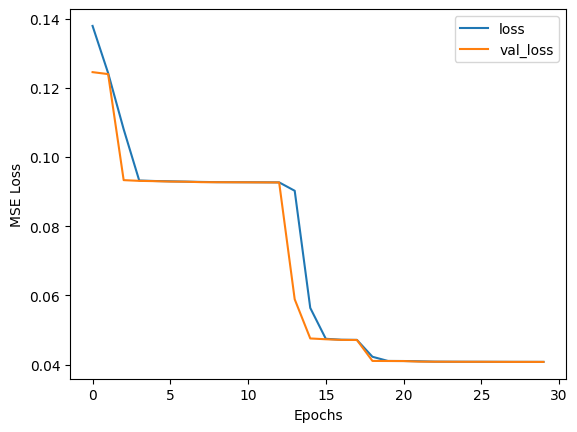

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [21]:
last_predictions = model.predict(X_test)
mse = np.mean(np.power(x_test_scaled - last_predictions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Adjust threshold based on your data and requirements

# Identify anomalies
y_pred = (mse > threshold).astype(int)

1888/1888 [==============================] - 11s 5ms/step


In [24]:
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred))

Threshold: 124432149.9403097
Accuracy: 0.9486699882475627
